In [171]:
import numpy as np
import matplotlib.pyplot as plt

In [172]:
def densf(lat, lon, gammas=20, radkm=100, epsilons=8000):

    lat, lon = map(np.radians, [lat, lon])
    haver_formula = np.sin(lat / 2.0) ** 2 + \
                    np.cos(lat) * np.sin(lon / 2.0) ** 2
    
    dists = 2 * np.arcsin(np.sqrt(haver_formula)) * 6367

    if dists <= radkm:
        # Point close to the center
        dens_f = gammas**4
        
    elif dists <= radkm + epsilons:
        # Point in the transition
        sx = (dists - radkm) / epsilons
        dens_f=((1-sx)*gammas+sx)**4
        
    else:
        # Point far from the center
        dens_f = 1
        
    dens_f = dens_f/gammas**4
    
    return dens_f
    

In [178]:
lat = np.arange(-40, 40, 1)
lon = np.arange(-40, 40, 1)
lonX, latY = np.meshgrid(lon, lat)
print(lonX, latY)

[[-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 ...
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]
 [-40 -39 -38 ...  37  38  39]] [[-40 -40 -40 ... -40 -40 -40]
 [-39 -39 -39 ... -39 -39 -39]
 [-38 -38 -38 ... -38 -38 -38]
 ...
 [ 37  37  37 ...  37  37  37]
 [ 38  38  38 ...  38  38  38]
 [ 39  39  39 ...  39  39  39]]


In [179]:
densf_vec = np.vectorize(densf)

In [180]:
d = densf_vec(latY, lonX)

In [181]:
print(d)

[[0.00792723 0.0088089  0.0097486  ... 0.01074639 0.0097486  0.0088089 ]
 [0.0088089  0.0097845  0.01082435 ... 0.01192863 0.01082435 0.0097845 ]
 [0.0097486  0.01082435 0.0119711  ... 0.0131891  0.0119711  0.01082435]
 ...
 [0.01074639 0.01192863 0.0131891  ... 0.01452819 0.0131891  0.01192863]
 [0.0097486  0.01082435 0.0119711  ... 0.0131891  0.0119711  0.01082435]
 [0.0088089  0.0097845  0.01082435 ... 0.01192863 0.01082435 0.0097845 ]]


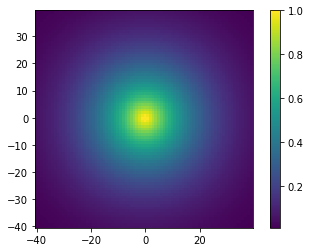

In [182]:
fig, ax = plt.subplots()
im = ax.pcolormesh(lonX, latY, d, shading='nearest')
ax.set_aspect('equal')
fig.colorbar(im, ax=ax)
plt.show()